<a href="https://colab.research.google.com/github/geanmatheus/pos-puc-minas/blob/main/Trabalho_ML_Demografia_Renda_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Pontifícia Universidade Católica de Minas Gerais

####Machine Learning - Renan Santos Mendes

####Gean Matheus Gonçalves

####Trabalhando Com Dados De Renda Do IBGE


Neste notebook vou usar [dados demográficos e de renda do PNAD](https://www.kaggle.com/datasets/upadorprofzs/testes), para separar em grupos e criar segmentos demográficos, usando um algoritmo de clusterização do Sckit Learning, o [Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) . O Objetivo é achar novos nichos de classe social diferentes das que o governo implementa.
Um artigo de apoio de como implementar foi extraído [desse link](https://neptune.ai/blog/customer-segmentation-using-machine-learning).

In [ ]:
##importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
##importando o arquivo
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/dados.csv", delimiter=";")

In [ ]:
##Visualizando o dataset
df

UF  Sexo  Idade  Cor  Anos de Estudo  Renda
0      11     0     23    8              12    800
1      11     1     23    2              12   1150
2      11     1     35    8              15    880
3      11     0     46    2               6   3500
4      11     1     47    8               9    150
...    ..   ...    ...  ...             ...    ...
76835  53     1     46    2              11    812
76836  53     0     30    4               7   1500
76837  53     0     32    8              12   1300
76838  53     0     57    8               4   1500
76839  53     0     38    8               4    900

[76840 rows x 6 columns]

In [ ]:
df.describe()

UF          Sexo         Idade           Cor  Anos de Estudo  \
count  76840.000000  76840.000000  76840.000000  76840.000000    76840.000000   
mean      31.912962      0.307002     44.071421      5.032613        9.469664   
std       11.147830      0.461253     12.480583      2.857118        4.539929   
min       11.000000      0.000000     13.000000      0.000000        1.000000   
25%       25.000000      0.000000     34.000000      2.000000        6.000000   
50%       31.000000      0.000000     43.000000      4.000000       11.000000   
75%       41.000000      1.000000     53.000000      8.000000       12.000000   
max       53.000000      1.000000     99.000000      8.000000       17.000000   

               Renda  
count   76840.000000  
mean     2000.383199  
std      3323.387730  
min         0.000000  
25%       788.000000  
50%      1200.000000  
75%      2000.000000  
max    200000.000000

In [ ]:
# Verificando a Correlação Entre as Variáveis
corr = df.corr()
corr.style.background_gradient()

Como vimos, as variáveis possuem baixa correlação entre si, sendo "Anos de estudo" a que possui maior correlação com a variável 'resposta' de renda.

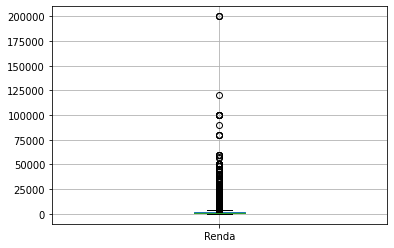

In [ ]:
#Verificando a dispersão dos dados

df.boxplot(['Renda'])


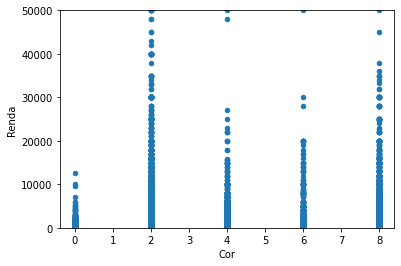

In [ ]:
df.plot.scatter(x='Cor', y='Renda', ylim=(0,50000));

#Código	Descrição
#0	Indígena
#2	Branca
#4	Preta
#6	Amarela
#8	Parda
#9	Sem declaração

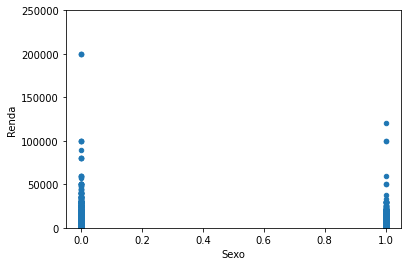

In [ ]:
df.plot.scatter(x='Sexo', y='Renda', ylim=(0,250000));


#Código	Descrição
#0	Masculino
#1	Feminino

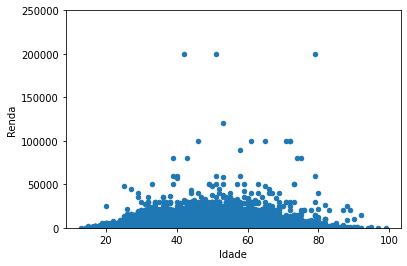

In [ ]:
df.plot.scatter(x='Idade', y='Renda', ylim=(0,250000));

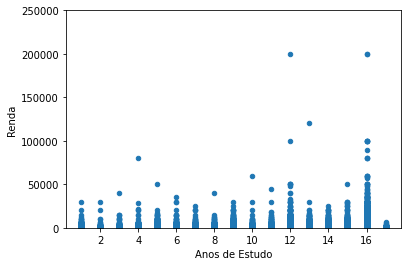

In [ ]:
df.plot.scatter(x='Anos de Estudo', y='Renda', ylim=(0,250000));

Os dados estão bem dispersos, não sendo necessário se preocupar muito com outliers, uma vez também que a base de dados é confiável e a renda realmente pode variar muito.

Edit: Após pesquisas, identifiquei a necessidade de realizar um ['robust scaling'](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) pelo menos na variável de renda, uma vez que a diferença do menor e do maior é muito grande. Mas isso seria um trabalho para as próximas versões.

In [ ]:
#Não é necessário separar a base em treino e teste, uma vez que não vamos prever nenhuma variável e não é necessário comparar.

x = df.iloc[:,:-1].values
#x_res = x.reshape((-1,1))
y = df.iloc[:,-1].values
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
X = x

In [ ]:
X

array([[11,  0, 23,  8, 12],
       [11,  1, 23,  2, 12],
       [11,  1, 35,  8, 15],
       ...,
       [53,  0, 32,  8, 12],
       [53,  0, 57,  8,  4],
       [53,  0, 38,  8,  4]])

In [ ]:
y

array([ 800, 1150,  880, ..., 1300, 1500,  900])

In [ ]:
##Criando as classes do modelo

In [ ]:
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)


In [ ]:
kmeans_model.fit(df)

KMeans(max_iter=400, random_state=42)

In [ ]:
# Create the K means model for different values of K
def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

In [ ]:
# Find output for k values between 1 to 12
outputs = try_different_clusters(12, df)
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

In [ ]:
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

Seundo o artigo de referência, deve-se observar à partir de qual quantidade de cluster, não há mais diferença significatia se aumentar mais um. Fiz um teste com 7 e com 5. Com 7 clusters, os super-ricos (200k) ficaram descolados dos ricos (30k), mas não necessariamente melhorou a clusterização. Então optei por manter 5 clusters.

In [ ]:
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

<ipython-input-14-746358cf1b4d>:2: RuntimeWarning:

overflow encountered in expm1



array([[3.12652215e+13, 3.92264499e-01, 1.07826670e+19, 1.98358296e+02,
        4.92053036e+03,            inf, 3.10735275e+01, 3.30931558e-01,
        4.38244716e+01, 5.29510369e+00, 8.50137481e+00, 1.03571053e+03],
       [2.21823942e+16, 1.82184522e-01, 6.35118822e+21, 2.29443459e+01,
        3.07658329e+06,            inf, 3.76380753e+01, 1.67364017e-01,
        5.02029289e+01, 3.17573222e+00, 1.49393305e+01, 2.51472552e+04],
       [4.94124801e+15, 2.35336851e-01, 2.19810563e+20, 3.44645914e+01,
        2.30573744e+06,            inf, 3.61363943e+01, 2.11343687e-01,
        4.68392978e+01, 3.56853477e+00, 1.46509115e+01, 9.97936799e+03],
       [1.38803666e+15, 2.21402758e-01, 1.22073636e+26, 1.33919161e+01,
        1.91775568e+06,            inf, 3.48666667e+01, 2.00000000e-01,
        6.00666667e+01, 2.66666667e+00, 1.44666667e+01, 1.15333333e+05],
       [1.09811079e+15, 2.49830274e-01, 1.81177864e+19, 6.69662839e+01,
        2.89491785e+05,            inf, 3.46323676e+01, 2.23

In [ ]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
df["clusters"] = kmeans_model_new.labels_

In [ ]:
df

UF  Sexo  Idade  Cor  Anos de Estudo  Renda  clusters
0      11     0     23    8              12    800         0
1      11     1     23    2              12   1150         0
2      11     1     35    8              15    880         0
3      11     0     46    2               6   3500         4
4      11     1     47    8               9    150         0
...    ..   ...    ...  ...             ...    ...       ...
76835  53     1     46    2              11    812         0
76836  53     0     30    4               7   1500         0
76837  53     0     32    8              12   1300         0
76838  53     0     57    8               4   1500         0
76839  53     0     38    8               4    900         0

[76840 rows x 7 columns]

In [ ]:
# visualize clusters

##Aqui eu peguei as variáveis mais importantes
figure = px.scatter_3d(df,
                    color='clusters',
                    x="Anos de Estudo",
                    y="Cor",
                    z="Renda",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout()
figure.show()

#####Conclusão:
Com 5 Clusters, o modelo chegou na mesma classificação que o governo usa, sendo as classes A, B, C, D, E. Entretando há um abismo muito grande entre os ricos(30k) e os super-ricos(+200k), mas como são poucas pessoas pode ser que esse agrupamento seja adequado. Caso uma empresa esteja tentando fazer uma segmentação de clientes, separar mais seja mais interessante, pois certas marcas de luxo não são acessíveis pela classe B. Outro fator, é o enorme abismo entre a classe média parda e branca e a classe pobre preta e indígena. Abismo esse que é explicado pelos problemas históricos do Brasil e pelo baixo acesso à educação. Realmente são necessárias políticas públicas de acesso à educação para a classe E.



---


No modelo abaixo tentei aplicar o PCA do dataset IRIS, nesse dataset do IBGE, mas não tive muito tempo de entender os resultados, ficando apenas como curiosidade.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
df2 = df
#df = px.data.iris()
features = ["Cor",	"Anos de Estudo",	"Renda"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}



In [ ]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["clusters"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
###https://neptune.ai/blog/customer-segmentation-using-machine-learning